## Make Clasiffication Prediction with Titanic Dataset

#### Build model for predict who will survice or die
- EDA
- Data Cleaning
- Dat Visualitattion
- Feature Enginnering
- Model Building
- Model Predict the data

## EDA (Exploratory Data Analyst)

In [2]:
# Import library for play with data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset
df = pd.read_csv('../Datasets/titanic.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### see the data types and null

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [7]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### describe the data

In [5]:
df.describe() # numeric

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='O') # categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jalsevac, Mr. Ivan",male,1601,G6,S
freq,1,577,7,4,644


#### ploting barplot survived and age 

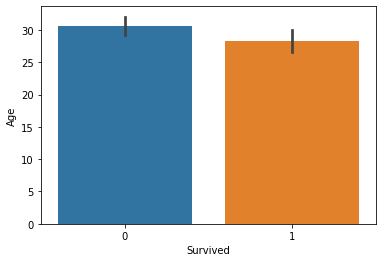

In [9]:
sns.barplot(x='Survived', y='Age', data=df); # default count is mean

#### plotting barplot survived and sex

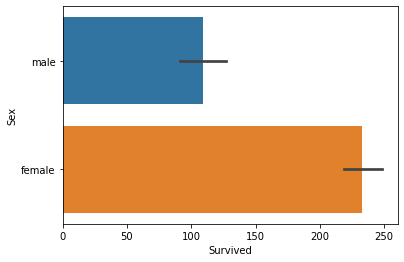

In [14]:
sns.barplot(x='Survived', y='Sex', data=df, estimator=sum);

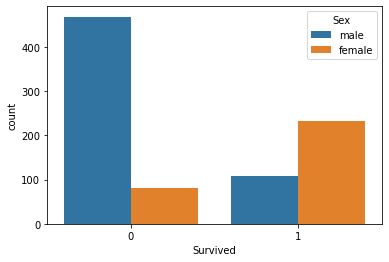

In [16]:
sns.countplot(x='Survived', hue='Sex', data=df);

## Data Cleaning

#### drop column Unnamed: 0

In [18]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### check missing value

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.shape

(891, 12)

## Data Visualitation

In [43]:
col_num = df[['Age','Parch','SibSp','Fare']]
col_cat = df.select_dtypes(include='object')

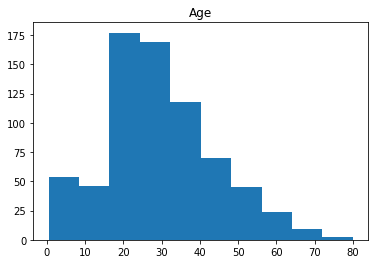

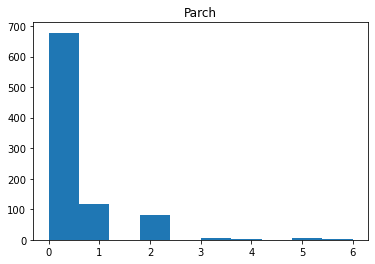

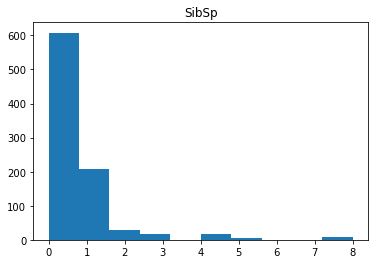

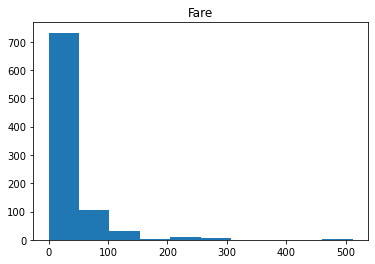

In [44]:
for i in col_num.columns:
    plt.hist(col_num[i])
    plt.title(i)
    plt.show()

# only column Age is distribution normal

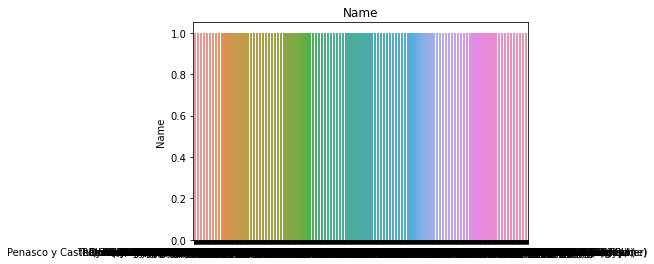

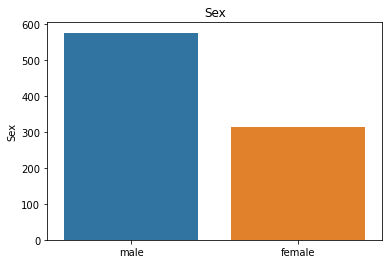

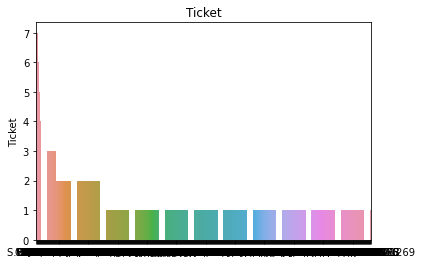

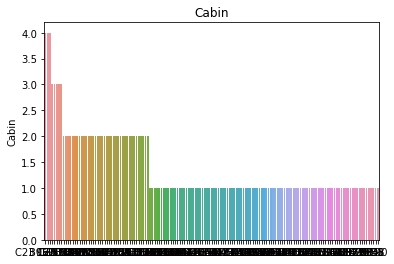

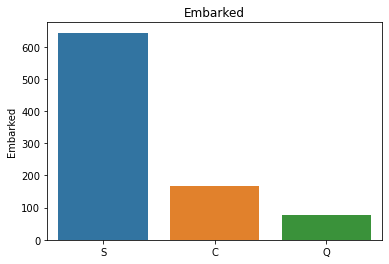

In [32]:
# barplot for col_cat

for i in col_cat.columns:
    sns.barplot(col_cat[i].value_counts().index, col_cat[i].value_counts()).set_title(i)
    plt.show()

# column name just ignore
# column ticket and cabin is messy

#### correlation the data

In [33]:
# correlation dataset df
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


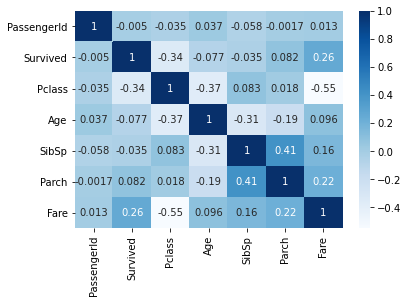

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='Blues');

In [45]:
# correlation col_num
col_num.corr()

,Age,Parch,SibSp,Fare
Age,1.000000,-0.189119,-0.308247,0.096067
Parch,-0.189119,1.000000,0.414838,0.216225
SibSp,-0.308247,0.414838,1.000000,0.159651
Fare,0.096067,0.216225,0.159651,1.000000


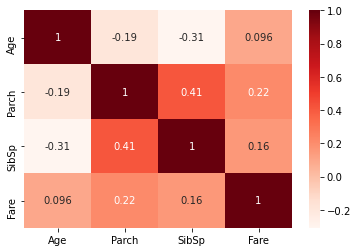

In [46]:
sns.heatmap(col_num.corr(), annot=True, cmap='Reds');

#### pivoting data

In [47]:
# pivot table survived, col_num
pd.pivot_table(df, index='Survived', values=col_num.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [50]:
# pivot table survived, pclass, fare, sex, sibsp, embarked

# pclass 
pd.pivot_table(df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [55]:
# fare
pd.pivot_table(df, index='Survived', columns=df.Fare.value_counts(), values='Ticket', aggfunc='count')

Fare,1.0,2.0,3.0,4.0,6.0,7.0,15.0,31.0,42.0
Survived,,,,,,,,,
0,6.0,6.0,2.0,3.0,1.0,NaN,1.0,1.0,1.0
1,1.0,3.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN


In [59]:
# sex
pd.pivot_table(df, index='Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [60]:
# sibsp
pd.pivot_table(df, index='Survived', columns='SibSp', values='Ticket', aggfunc='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [61]:
# embarked
pd.pivot_table(df, index='Survived', columns='Embarked', values='Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


## Feature Enginerring

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
Don               1
Lady              1
Jonkheer          1
the Countess      1
Capt              1
Sir               1
Mme               1
Name: name_title, dtype: int64

In [84]:
pd.pivot_table(df, index='Survived', columns='name_title', values='Fare', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [71]:
df['num_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['cat_ticket'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [73]:
df['num_ticket'].value_counts()

1    661
0    230
Name: num_ticket, dtype: int64

In [82]:
pd.pivot_table(df, index='Survived', columns='num_ticket', values='Ticket', aggfunc='count')

num_ticket,0,1
Survived,,
0,142,407
1,88,254


In [74]:
df['cat_ticket'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
wep            3
sopp           3
swpp           2
scah           2
ppp            2
sotono2        2
casoton        1
sc             1
fc             1
scahbasle      1
sop            1
as             1
scow           1
sca4           1
fa             1
sp             1
Name: cat_ticket, dtype: int64

In [83]:
pd.pivot_table(df, index='Survived', columns='cat_ticket', values='Ticket', aggfunc='count')

cat_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [76]:
df['cabin_new'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_alp'] = df.Cabin.apply(lambda x: str(x)[0])

In [77]:
df['cabin_new'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_new, dtype: int64

In [85]:
pd.pivot_table(df, index='Survived', columns='cabin_new', values='Name', aggfunc='count')

cabin_new,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [78]:
df['cabin_alp'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_alp, dtype: int64

In [86]:
pd.pivot_table(df, index='Survived', columns='cabin_alp', values='Name', aggfunc='count')

cabin_alp,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


## Model Building